# Entrenamiento de red neuronal

Implementación de robótica inteligente (Gpo 501)

Hecho por:

A01736196 | Abraham Ortiz Castro

A01736001 | Alan Iván Flores Juarez

A01736171 | Jesús Alejandro Gómez Bautista

A01735823 | Ulises Hernández Hernández

Profesores:

César Torres Huitzil

Juan Manuel Ahuactzin Larios

Rigoberto Cerino Jiménez

Alfredo García Suárez

Fecha:
10 de junio de 2024

Este notebook fue usado para entrenar la red neuronal convulucional con el fin de detectar diferentes señales de tránsito, esto será con la ayuda de la red preentrenada YOLO.

# Instalación de las librerias necesarias.

## Importación del directorio

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/home/ulises/Documents/Sexto_semestre/Implementacion_robotica/Manchester/YOLO_puzzlebot


## Se instala ultralytics

In [2]:
# Instalación de las librerias necesarias

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 3902MiB)
Setup complete ✅ (16 CPUs, 15.0 GB RAM, 67.4/120.5 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

## Comprobación de instalación de las librerias usando un modelo ya precargado.

/home/ulises/Documents/Sexto_semestre/Implementacion_robotica/Manchester/YOLO_puzzlebot
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 3902MiB)
YOLOv8s summary (fused): 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /home/ulises/Documents/Sexto_semestre/Implementacion_robotica/Manchester/YOLO_puzzlebot/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 handbag, 75.4ms
Speed: 1.4ms preprocess, 75.4ms inference, 262.3ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict13
💡 Learn more at https://docs.ultralytics.com/modes/predict
/home/ulises/Documents/Sexto_semestre/Implementacion_robotica/Manchester/YOLO_puzzlebot


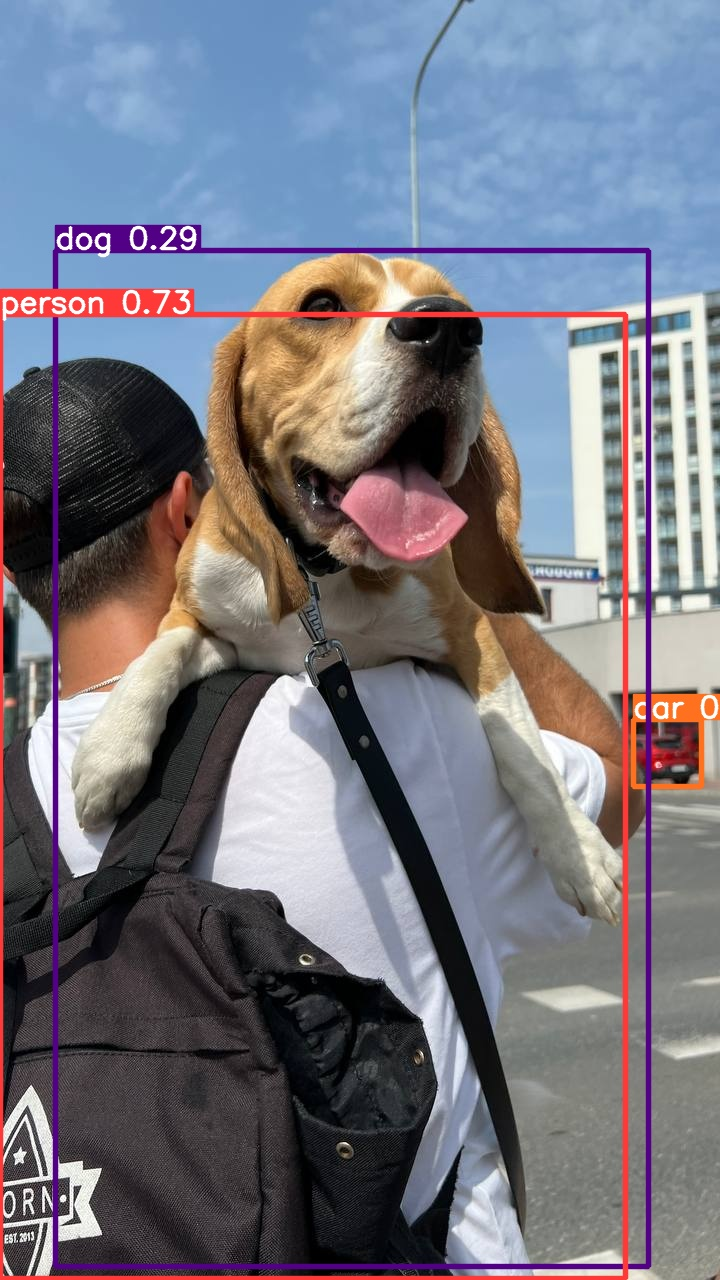

In [4]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

## Se exporta el dataset creado en roboflow

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="7Op987rIKig5Hi85TVuF")
project = rf.workspace("deteccion-objetos").project("deteccionseniales2.0")
version = project.version(9)
dataset = version.download("yolov8")

mkdir: cannot create directory ‘/home/ulises/Documents/Sexto_semestre/Implementacion_robotica/Manchester/YOLO_puzzlebot/datasets’: File exists
/home/ulises/Documents/Sexto_semestre/Implementacion_robotica/Manchester/YOLO_puzzlebot/datasets
Defaulting to user installation because normal site-packages is not writeable
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to DeteccionSeniales2.0-9 in yolov8:: 100%|█| 105


## Se entrena el modelo

In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=40 imgsz=340 plots=True cache=True

/home/ulises/Documents/Sexto_semestre/Implementacion_robotica/Manchester/YOLO_puzzlebot
New https://pypi.org/project/ultralytics/8.2.29 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 3902MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/home/ulises/Documents/Sexto_semestre/Implementacion_robotica/Manchester/YOLO_puzzlebot/datasets/DeteccionSeniales2.0-9/data.yaml, epochs=40, patience=50, batch=16, imgsz=340, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, d

## Se observan los resultados obtenidos.

In [7]:
!ls {HOME}/runs/detect/train17/

args.yaml
confusion_matrix_normalized.png
confusion_matrix.png
events.out.tfevents.1717975701.ainse-HP-EliteDesk-705-G2-SFF.50020.0
F1_curve.png
labels_correlogram.jpg
labels.jpg
P_curve.png
PR_curve.png
R_curve.png
results.csv
results.png
train_batch0.jpg
train_batch1.jpg
train_batch2.jpg
train_batch8130.jpg
train_batch8131.jpg
train_batch8132.jpg
val_batch0_labels.jpg
val_batch0_pred.jpg
val_batch1_labels.jpg
val_batch1_pred.jpg
val_batch2_labels.jpg
val_batch2_pred.jpg
weights


## Matríz de confusión

/home/ulises/Documents/Sexto_semestre/Implementacion_robotica/Manchester/YOLO_puzzlebot


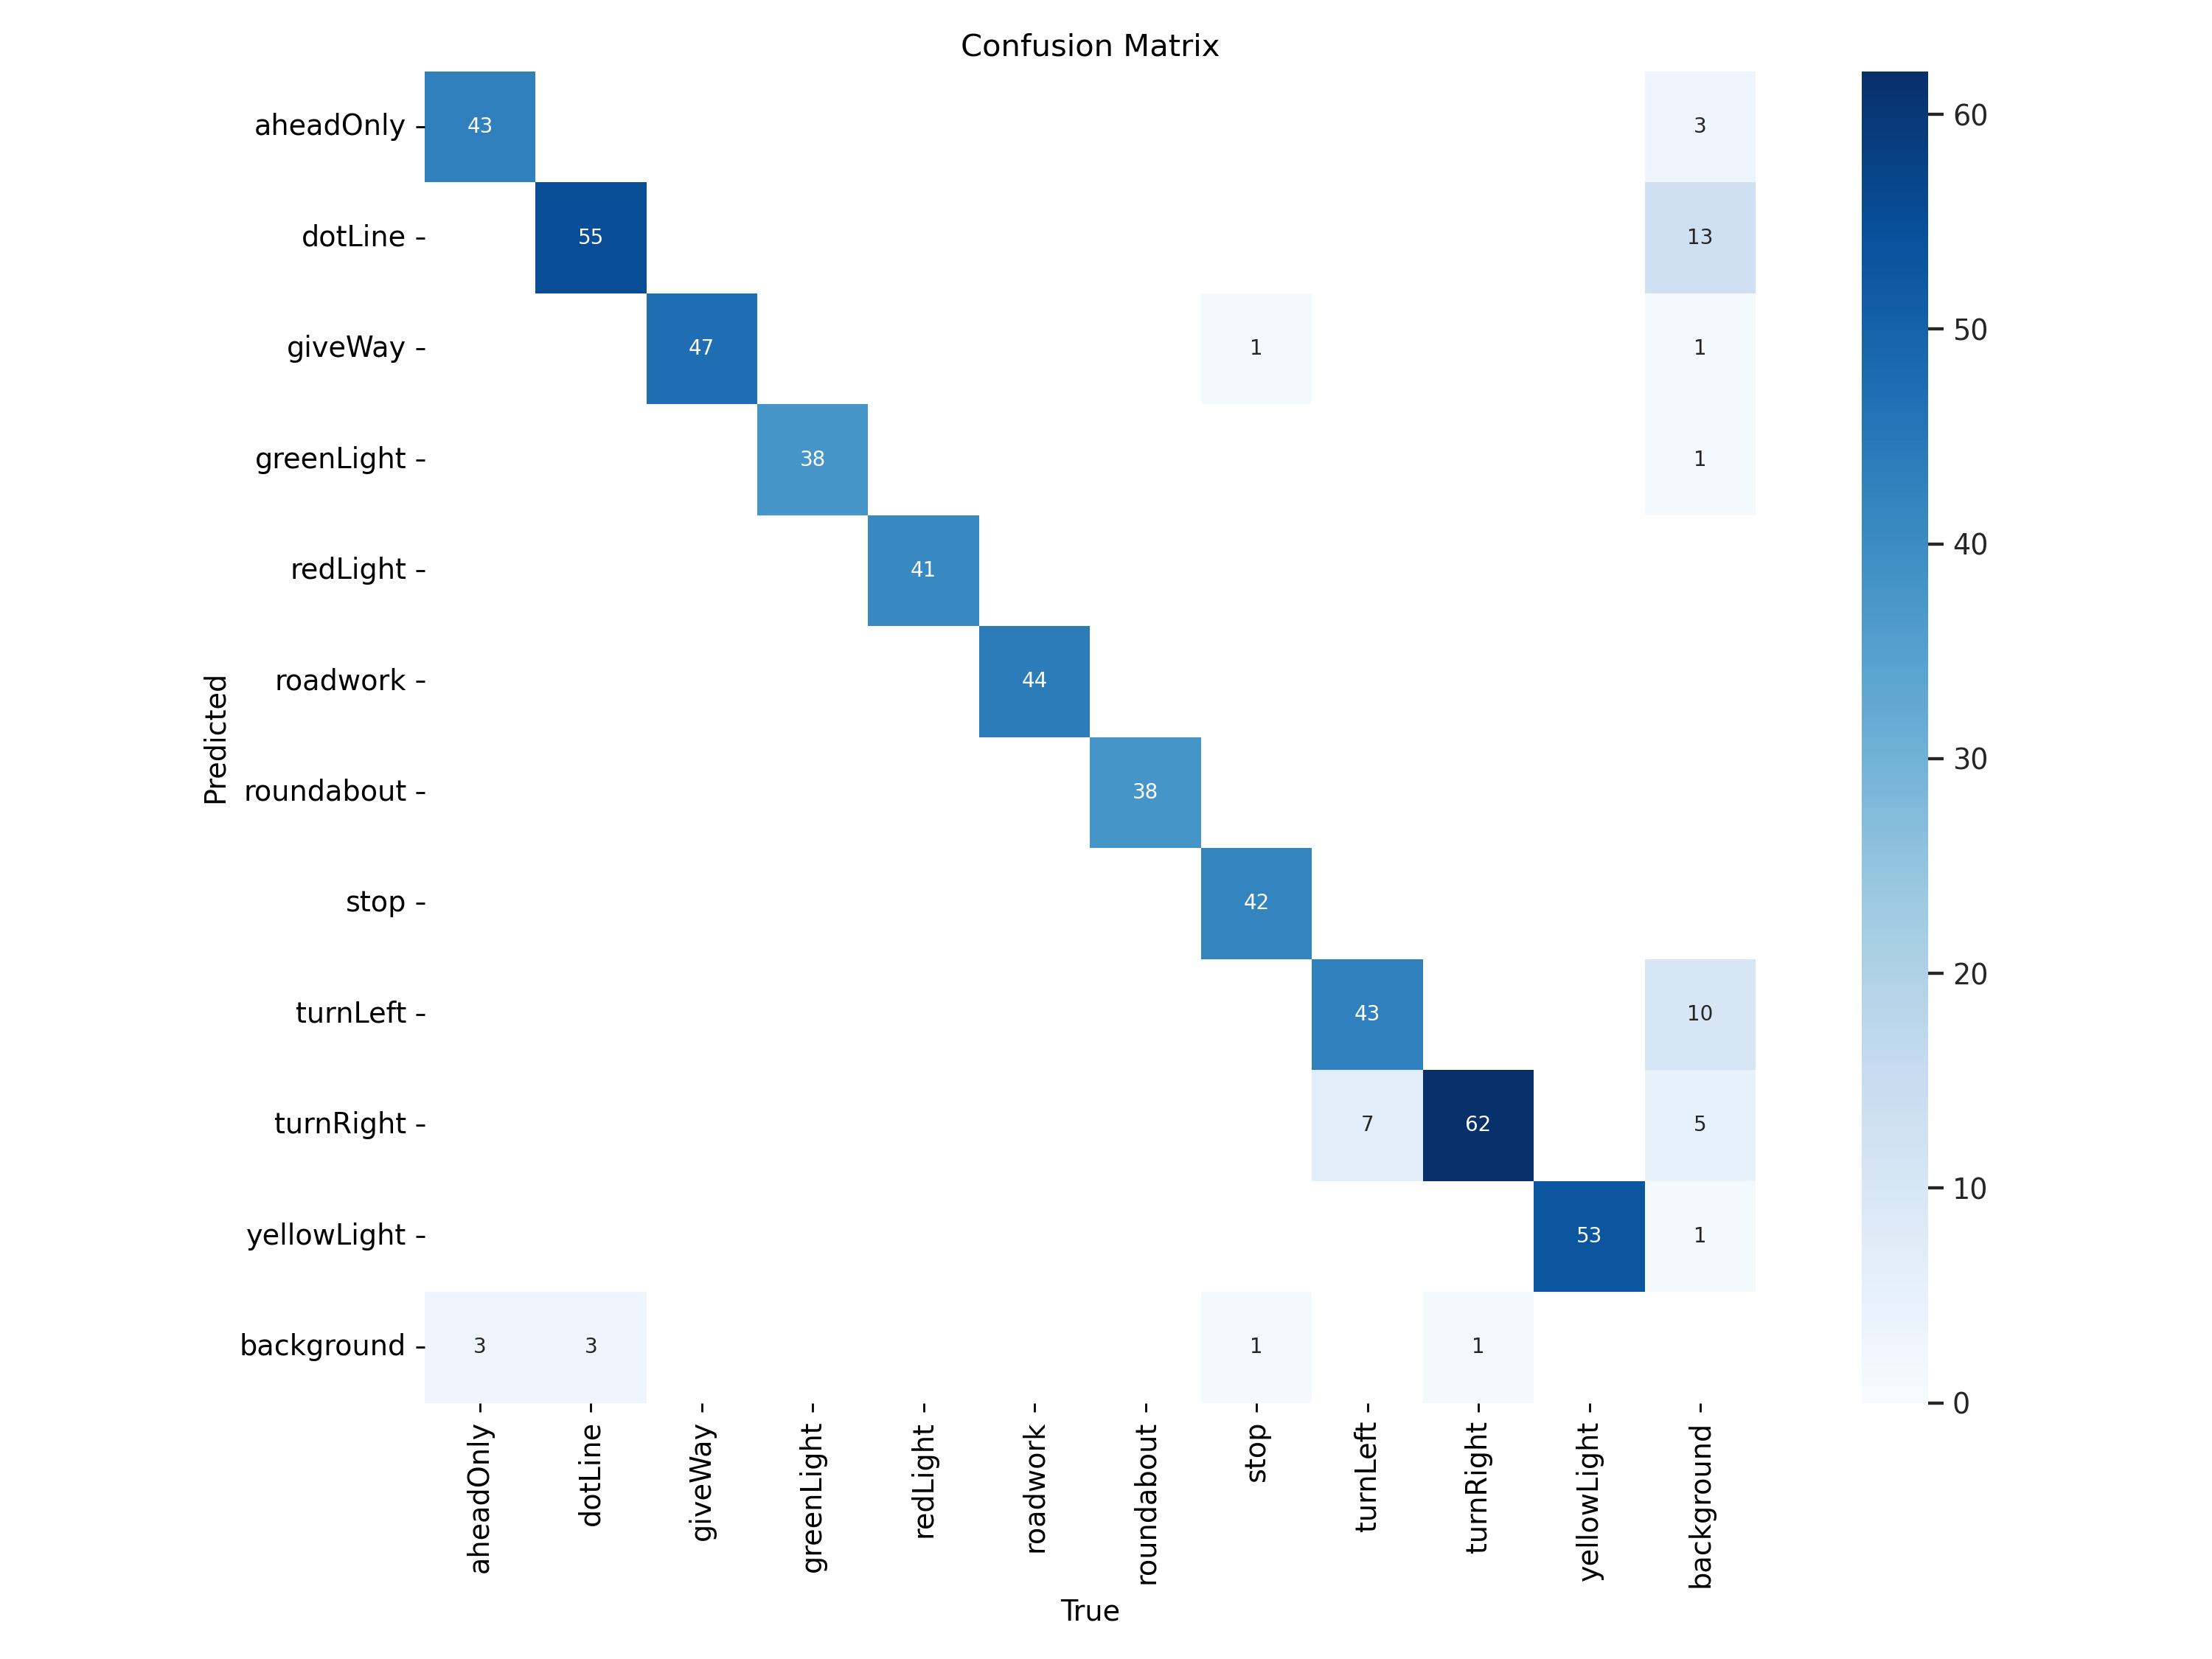

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train17/confusion_matrix.png', width=600)

## Historial del modelo

/home/ulises/Documents/Sexto_semestre/Implementacion_robotica/Manchester/YOLO_puzzlebot


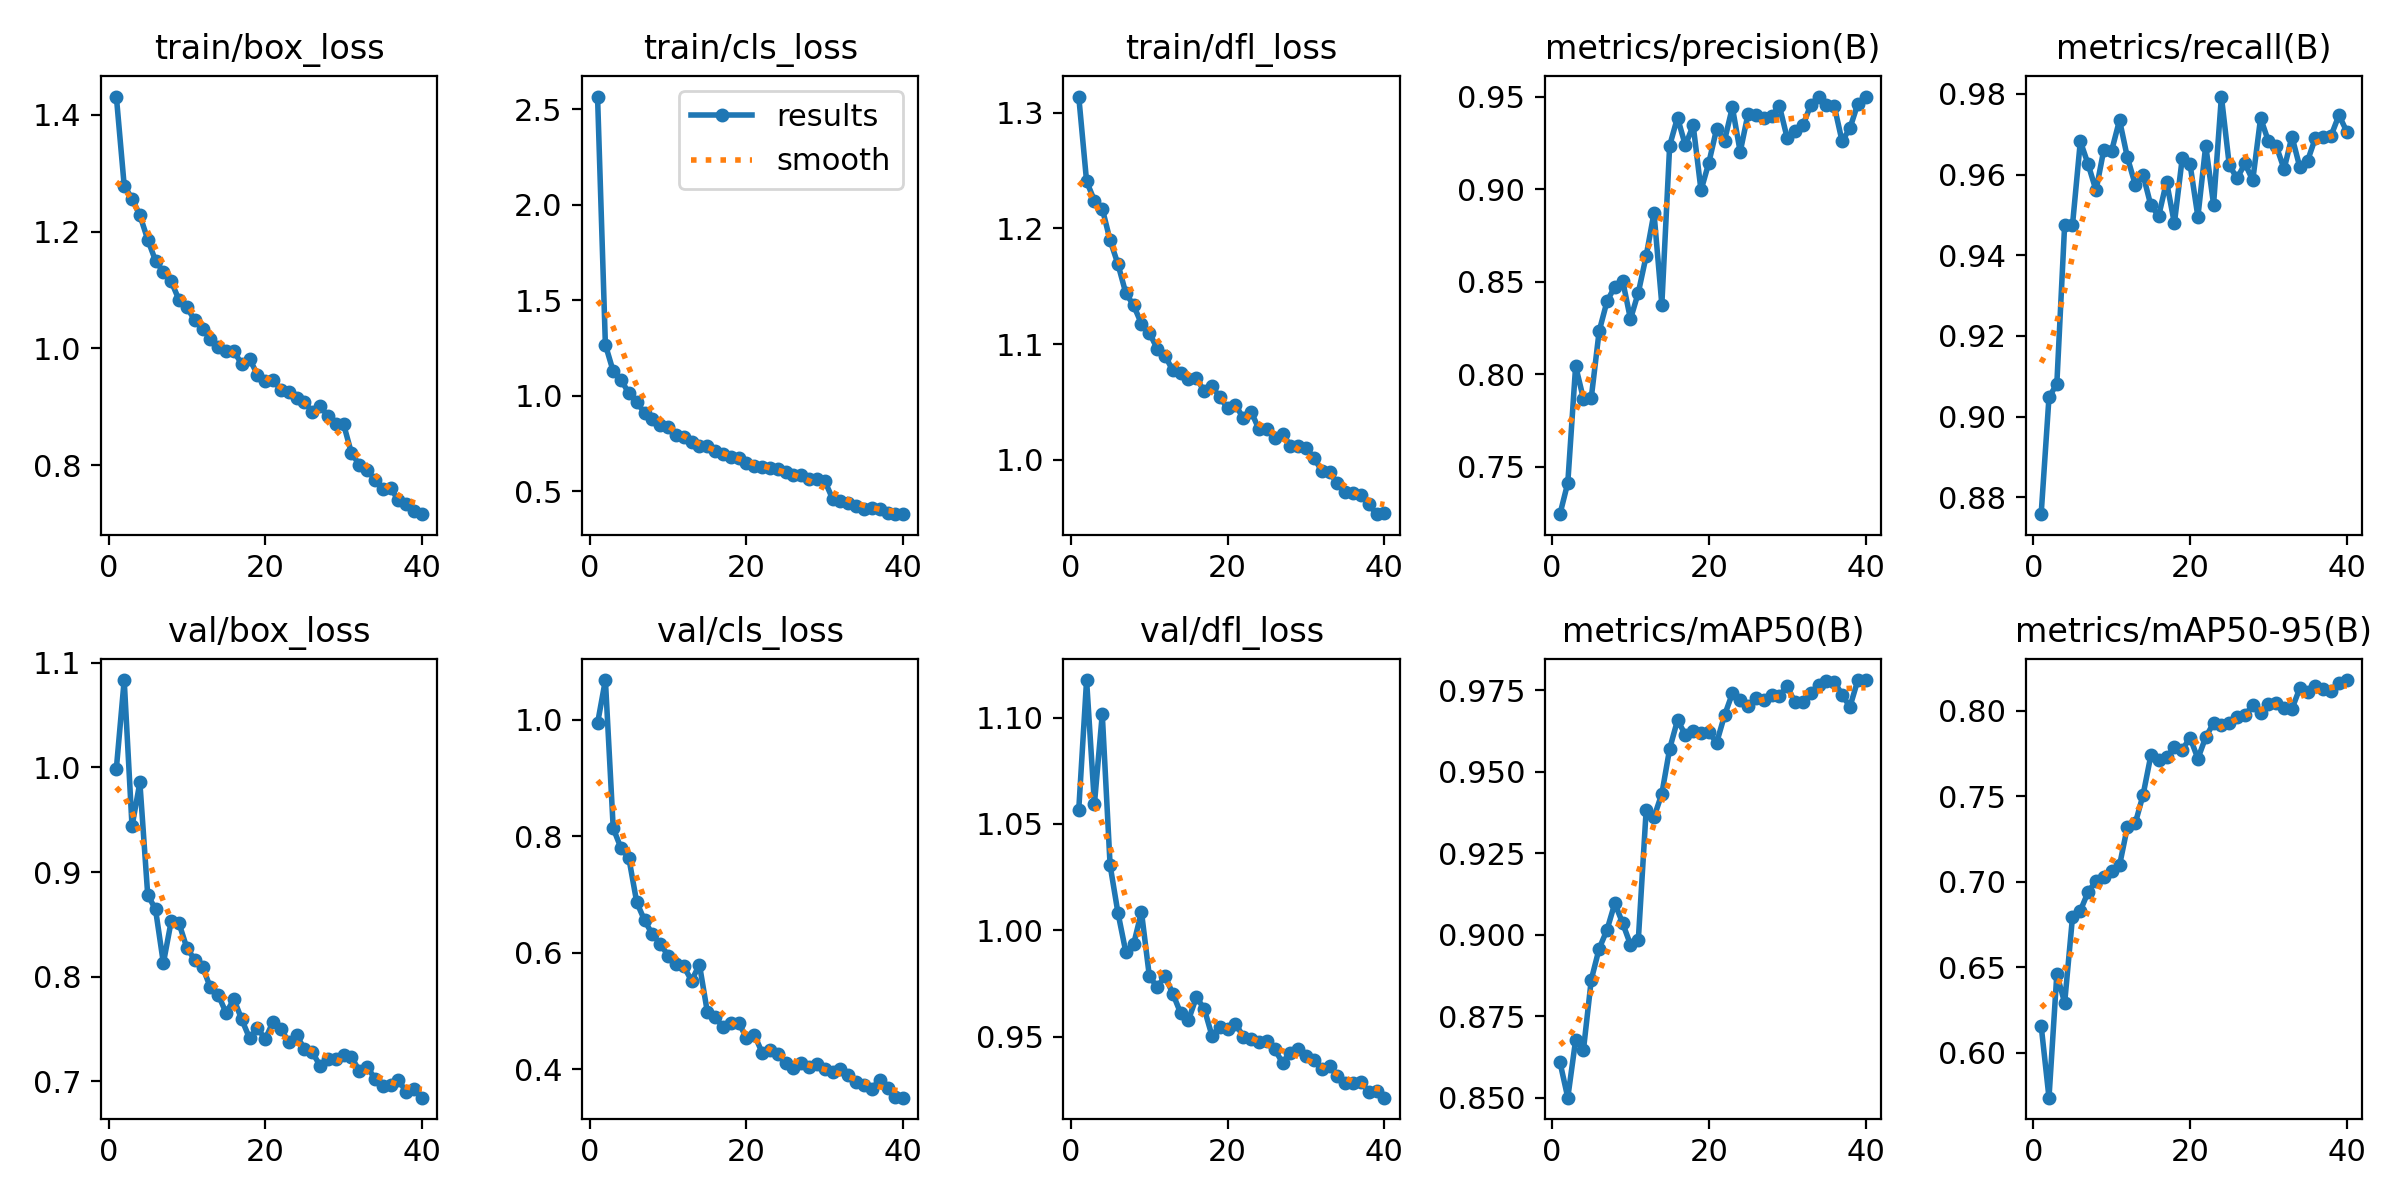

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train17/results.png', width=600)